In [ ]:
!pip install pmdarima

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pmdarima as pm
#from pmdarima import auto_arima
import pmdarima as pm
# Ignore harmless warnings|
import warnings
warnings.filterwarnings("ignore")

#MAPE and RMSE
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
df=pd.read_excel('/content/EV_SALES.xlsx',sheet_name='PC')
df.head()
df.isnull().sum()
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(df['Month'], df['Actual'], marker='o', linestyle='-', color='b')  # Plot with line and markers
# Adding title and labels
plt.title('EV Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()

df.set_index('Month',inplace=True) #keep the Month column as the new index

#Filter data
start=0
leng = 49 #till where actual data is available: Change this value every month
data = df.iloc[start:leng,:]

#Check if data is stationary or not by Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
series = df['Actual'].dropna()
# Perform the Augmented Dickey-Fuller test
result = adfuller(series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(df['Actual'].dropna(), model='additive')  # or use model='multiplicative'

# Plot the decomposed components
result.plot()
plt.show()

df.drop('Actual First Difference',axis=1,inplace=True)

from sklearn.feature_selection import mutual_info_regression
import pandas as pd
# Calculate mutual information between sales and each exogenous variable
mi_scores = mutual_info_regression(data[['Season', 'Indicator_Variable', 'Tesla_Sales', 'Tesla_SAAR','cc']],
                                   data['Actual'])
# Create a DataFrame to hold the mutual information scores
mi_df = pd.DataFrame({'Exogenous_Variable': ['Season', 'Indicator_Variable', 'Tesla_Sales', 'Tesla_SAAR','cc'],
'Mutual_Information': mi_scores})
# Sort the DataFrame by mutual information scores in descending order
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display the mutual information scores and ranking of exogenous variables
print("Mutual Information between Sales and each Exogenous Variable:")
print(mi_df)

# Select the best features based on the highest mutual information scores
# You can set a threshold to select a specific number of top features
threshold = 0.5 # Example threshold value
best_features = mi_df[mi_df['Mutual_Information'] >= threshold]['Exogenous_Variable']

# Display the best features
print("\nBest Features based on Mutual Information:")
print(best_features)
#select the exogeneous features based on mutual information
# among :['Season','Indicator_Variable','Tesla_Sales','Tesla_SAAR','cc']
#exogenous_features = ['Season','Tesla_Sales']

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pmdarima as pm
#from pmdarima import auto_arima
import pmdarima as pm
# Ignore harmless warnings|
import warnings
warnings.filterwarnings("ignore")

#MAPE and RMSE
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm



In [ ]:
df=pd.read_excel('/content/EV_SALES.xlsx',sheet_name='PC')

In [ ]:
df.head()

,Month,Actual,Season,Indicator_Variable,Tesla_Sales,Tesla_SAAR,cc
0,2020/01,9956.0,0.101019,0.691307,170,0.023060,-8.7
1,2020/02,8456.0,0.085799,0.691307,1047,0.142024,-7.4
2,2020/03,4510.0,0.045761,0.691307,1580,0.214324,-12.5
3,2020/04,218.0,0.002212,0.000000,216,0.029300,-21.9
4,2020/05,3111.0,0.031566,0.000000,269,0.036489,-17.8


In [ ]:
df.tail()

,Month,Actual,Season,Indicator_Variable,Tesla_Sales,Tesla_SAAR,cc
48,2024/1,18904.0,0.044121,1.005697,3118,0.005550,-11.5
49,2024/2,NaN,0.060030,1.005697,3244,0.073564,-14.4
50,2024/3,NaN,0.100055,1.005697,8710,0.158482,-13.3
51,2024/4,NaN,0.058079,0.059517,1824,0.013411,-19.1
52,2024/5,NaN,0.073461,0.059517,4012,0.049557,-17.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               53 non-null     object 
 1   Actual              49 non-null     float64
 2   Season              53 non-null     float64
 3   Indicator_Variable  53 non-null     float64
 4   Tesla_Sales         53 non-null     int64  
 5   Tesla_SAAR          53 non-null     float64
 6   cc                  53 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
df.shape

(53, 7)

In [ ]:
df.isnull().sum()

Month                 0
Actual                4
Season                0
Indicator_Variable    0
Tesla_Sales           0
Tesla_SAAR            0
cc                    0
dtype: int64

In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month               53 non-null     datetime64[ns]
 1   Actual              49 non-null     float64       
 2   Season              53 non-null     float64       
 3   Indicator_Variable  53 non-null     float64       
 4   Tesla_Sales         53 non-null     int64         
 5   Tesla_SAAR          53 non-null     float64       
 6   cc                  53 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.0 KB


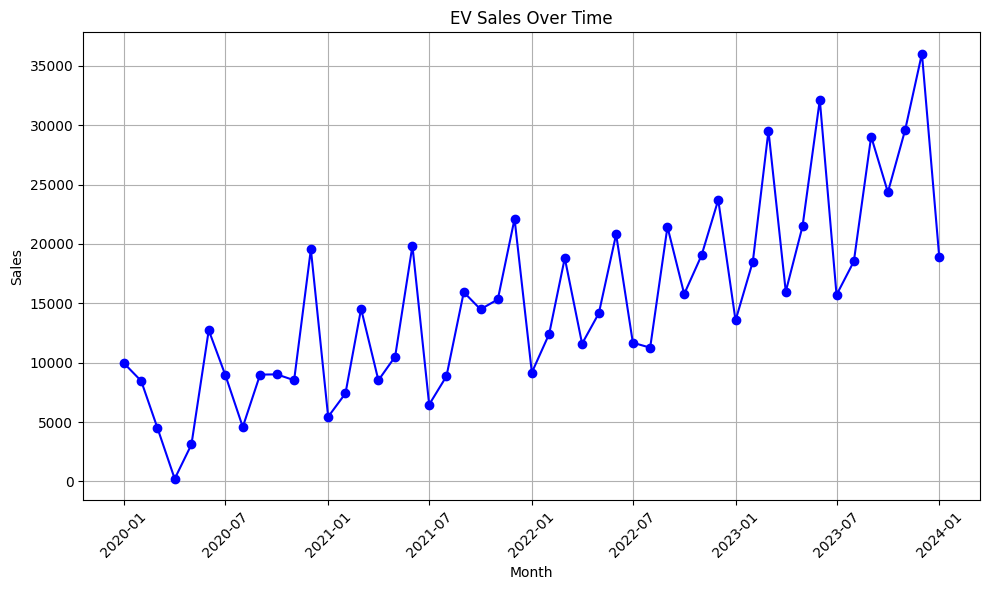

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(df['Month'], df['Actual'], marker='o', linestyle='-', color='b')  # Plot with line and markers
# Adding title and labels
plt.title('EV Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()

In [ ]:
df.set_index('Month',inplace=True) #keep the Month column as the new index

In [ ]:
df

,Actual,Season,Indicator_Variable,Tesla_Sales,Tesla_SAAR,cc
Month,,,,,,
2020-01-01,9956.0,0.101019,0.691307,170,0.023060,-8.7
2020-02-01,8456.0,0.085799,0.691307,1047,0.142024,-7.4
2020-03-01,4510.0,0.045761,0.691307,1580,0.214324,-12.5
2020-04-01,218.0,0.002212,0.000000,216,0.029300,-21.9
2020-05-01,3111.0,0.031566,0.000000,269,0.036489,-17.8
2020-06-01,12733.0,0.129196,0.000000,728,0.098752,-12.5
2020-07-01,8919.0,0.090497,0.067002,148,0.020076,-11.8
2020-08-01,4582.0,0.046491,0.067002,269,0.036489,-12.2
2020-09-01,8992.0,0.091237,0.067002,1267,0.171867,-10.9


In [ ]:
#Filter data
start=0
leng = 49 #till where actual data is available: Change this value every month
data = df.iloc[start:leng,:]

In [ ]:
data.head(1)

,Actual,Season,Indicator_Variable,Tesla_Sales,Tesla_SAAR,cc
Month,,,,,,
2020-01-01,9956.0,0.101019,0.691307,170,0.02306,-8.7


In [ ]:
data.tail(1)

,Actual,Season,Indicator_Variable,Tesla_Sales,Tesla_SAAR,cc
Month,,,,,,
2024-01-01,18904.0,0.044121,1.005697,3118,0.00555,-11.5


In [ ]:
#Check if data is stationary or not by Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
series = df['Actual'].dropna()
# Perform the Augmented Dickey-Fuller test
result = adfuller(series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.745456
p-value: 1.000000
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


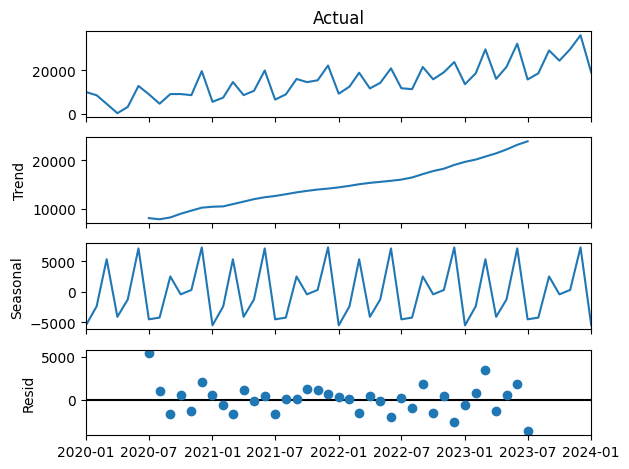

In [ ]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(df['Actual'].dropna(), model='additive')  # or use model='multiplicative'

# Plot the decomposed components
result.plot()
plt.show()

In [ ]:
#De trend by first/second/third order differencing
df['Actual First Difference'] = df['Actual'] - df['Actual'].shift(1)

In [ ]:
#Check if data is stationary or not by Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
series = df['Actual First Difference'].dropna()
# Perform the Augmented Dickey-Fuller test
result = adfuller(series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.247999
p-value: 0.000000
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


In [ ]:
df.head()

,Actual,Season,Indicator_Variable,Tesla_Sales,Tesla_SAAR,cc,Actual First Difference
Month,,,,,,,
2020-01-01,9956.0,0.101019,0.691307,170,0.023060,-8.7,NaN
2020-02-01,8456.0,0.085799,0.691307,1047,0.142024,-7.4,-1500.0
2020-03-01,4510.0,0.045761,0.691307,1580,0.214324,-12.5,-3946.0
2020-04-01,218.0,0.002212,0.000000,216,0.029300,-21.9,-4292.0
2020-05-01,3111.0,0.031566,0.000000,269,0.036489,-17.8,2893.0


In [ ]:
df.drop('Actual First Difference',axis=1,inplace=True)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
# Calculate mutual information between sales and each exogenous variable
mi_scores = mutual_info_regression(data[['Season', 'Indicator_Variable', 'Tesla_Sales', 'Tesla_SAAR','cc']],
                                   data['Actual'])
# Create a DataFrame to hold the mutual information scores
mi_df = pd.DataFrame({'Exogenous_Variable': ['Season', 'Indicator_Variable', 'Tesla_Sales', 'Tesla_SAAR','cc'],
'Mutual_Information': mi_scores})
# Sort the DataFrame by mutual information scores in descending order
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display the mutual information scores and ranking of exogenous variables
print("Mutual Information between Sales and each Exogenous Variable:")
print(mi_df)

Mutual Information between Sales and each Exogenous Variable:
   Exogenous_Variable  Mutual_Information
0              Season            0.609330
2         Tesla_Sales            0.532675
3          Tesla_SAAR            0.106710
4                  cc            0.040951
1  Indicator_Variable            0.000000


In [ ]:
# Select the best features based on the highest mutual information scores
# You can set a threshold to select a specific number of top features
threshold = 0.5 # Example threshold value
best_features = mi_df[mi_df['Mutual_Information'] >= threshold]['Exogenous_Variable']

# Display the best features
print("\nBest Features based on Mutual Information:")
print(best_features)


Best Features based on Mutual Information:
0         Season
2    Tesla_Sales
Name: Exogenous_Variable, dtype: object


In [ ]:
df.columns

Index(['Actual', 'Season', 'Indicator_Variable', 'Tesla_Sales', 'Tesla_SAAR',
       'cc'],
      dtype='object')

In [ ]:
#select the exogeneous features based on mutual information
# among :['Season','Indicator_Variable','Tesla_Sales','Tesla_SAAR','cc']
exogenous_features = ['Season','Tesla_Sales']

<Figure size 1000x500 with 0 Axes>

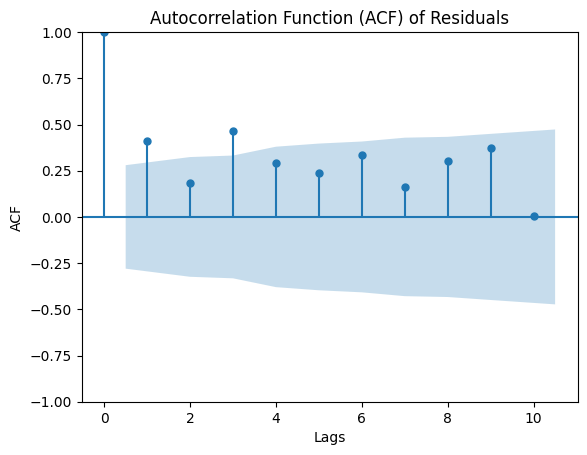

<Figure size 1000x500 with 0 Axes>

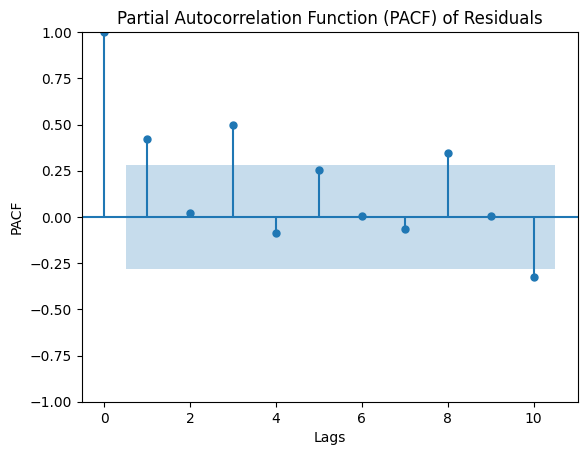

In [ ]:
# Define the endogenous variable and exogenous variables
endog = data['Actual']
exog = data[exogenous_features]

# Fit an OLS regression model to remove the influence of exogenous variables
model = sm.OLS(endog, sm.add_constant(exog)).fit()

# Get the residuals from the model
residuals = model.resid

# Plot ACF of the residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=10)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF of the residuals
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=10, method='yw')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()


In [ ]:
print(endog)

Month
2020-01-01     9956.0
2020-02-01     8456.0
2020-03-01     4510.0
2020-04-01      218.0
2020-05-01     3111.0
2020-06-01    12733.0
2020-07-01     8919.0
2020-08-01     4582.0
2020-09-01     8992.0
2020-10-01     9015.0
2020-11-01     8520.0
2020-12-01    19544.0
2021-01-01     5442.0
2021-02-01     7412.0
2021-03-01    14534.0
2021-04-01     8515.0
2021-05-01    10509.0
2021-06-01    19844.0
2021-07-01     6469.0
2021-08-01     8858.0
2021-09-01    15935.0
2021-10-01    14491.0
2021-11-01    15327.0
2021-12-01    22110.0
2022-01-01     9168.0
2022-02-01    12416.0
2022-03-01    18811.0
2022-04-01    11596.0
2022-05-01    14154.0
2022-06-01    20805.0
2022-07-01    11680.0
2022-08-01    11262.0
2022-09-01    21434.0
2022-10-01    15780.0
2022-11-01    19027.0
2022-12-01    23704.0
2023-01-01    13556.0
2023-02-01    18515.0
2023-03-01    29533.0
2023-04-01    15980.0
2023-05-01    21478.0
2023-06-01    32131.0
2023-07-01    15710.0
2023-08-01    18524.0
2023-09-01    29040.0
2023

In [ ]:
model = pm.auto_arima(data.Actual, X=data[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True,seasonal=False,d=1,
            start_p=1,start_q=1,max_p=3,max_q=3,with_intercept=False)
model.fit(data.Actual, X=data[exogenous_features])
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=863.652, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.403, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=868.208, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=861.735, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=858.662, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=856.857, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=841.186, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=843.173, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=842.441, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=841.862, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=855.042, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=844.102, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=845.063, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=841.022, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, 

In [ ]:
data["Forecast_ARIMAX"]=model.fittedvalues()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Sales')]

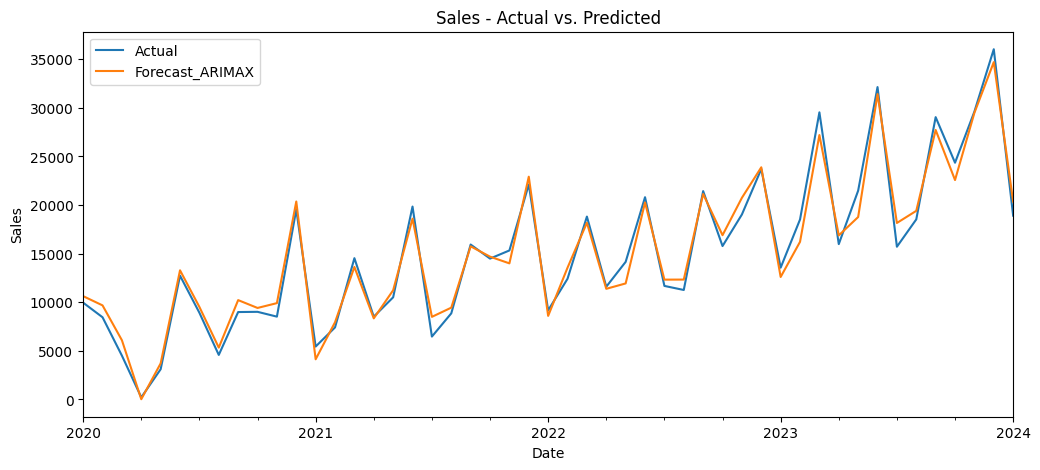

In [ ]:
# Plot predictions against known values
title = 'Sales - Actual vs. Predicted'
ylabel='Sales'
xlabel='Date'

ax = data.Actual.plot(legend=True,figsize=(12,5),title=title)
data.Forecast_ARIMAX.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
#Error
rmse = np.sqrt(mean_squared_error(data['Actual'], data['Forecast_ARIMAX'][data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(data['Actual']-data['Forecast_ARIMAX'][data.index.min():])/data['Actual'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.DataFrame({'Method':['ARIMA'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,ARIMA,1205.6,10.19


In [ ]:
exogenous_features = ['Season','Tesla_Sales']

In [ ]:
#Start index to be changed every month
start_value = leng
data = df.iloc[start_value:,:]
data.head()
#Change n_periods every month
forecast = model.predict(n_periods=4, X=data[exogenous_features],return_conf_int=True)

In [ ]:
#Forecast
pd.DataFrame(forecast[0])
#Forecast
x=pd.DataFrame(forecast[0])

In [ ]:
x.to_excel(r"/content/EV_SALES.xlsx")